In [14]:
import pickle
import numpy as np
from matplotlib import colors
import matplotlib.pyplot as plt
import pandas as pd

In this notebook we show the results obtained for all the experiments performed in our project. That is, for our probabilistic graphical model (fullmodel) and all the baseline methods. All models are trained with their respective experiment code, stored in .py files. In particular:

* **Probabilistic graphical model**: fullmodel.py and fullmodel_hidden.py
* **Baseline_0**: baseline_0.py
* **Baseline_cycles**: baseline_cycles.py
* **Naive EM**: baseline_NaiveEM.py
* **EM with label proportions**: baseline_EM.py

Running these files starts the whole process: loading the data and preprocessing it (directly in the initialization method of the dataset class), creating the EM object (if needed) and training the corresponding model. Results are automatically stored in pickle files in the *results* folder.

Here we import these results files and show the metrics and probability distributions obtained. The probability distributions are shown separated by three different factors: (i) true label (implanted or not), (ii) transference and (iii) ASEBIR quality score. 

# Full model

We start showing the results for our probabilistic graphical model, which is the main focus of our project.

First we import the results files for both the case with the ASEBIR score as a feature and the one without it (hidden).


In [6]:
with open("results/aucroc_ETREES.pickle", 'rb') as f_pckl3:
    l_results_ETREES = pickle.load(f_pckl3)
with open("results/aucroc_GBOOST.pickle", 'rb') as f_pckl4:
    l_results_GBOOST = pickle.load(f_pckl4)
with open("results/aucroc_LR.pickle", 'rb') as f_pckl5:
    l_results_LR = pickle.load(f_pckl5)
with open("results/aucroc_RF200.pickle", 'rb') as f_pckl7:
    l_results_RF200 = pickle.load(f_pckl7)

with open("results/ehu_experiment_metrics_ETREES_k5_ems100.pickle", 'rb') as f_pckl3:
    l_metrics_ETREES = pickle.load(f_pckl3)
with open("results/ehu_experiment_metrics_GBOOST_k5_ems100.pickle", 'rb') as f_pckl4:
    l_metrics_GBOOST = pickle.load(f_pckl4)
with open("results/ehu_experiment_metrics_LR_k5_ems100.pickle", 'rb') as f_pckl5:
    l_metrics_LR = pickle.load(f_pckl5)
with open("results/ehu_experiment_metrics_RF200_k5_ems100.pickle", 'rb') as f_pckl7:
    l_metrics_RF200 = pickle.load(f_pckl7)

with open("results/probabilities_ETREES.pickle", 'rb') as f_pckl3:
    prob_ETREES = pickle.load(f_pckl3)
with open("results/probabilities_GBOOST.pickle", 'rb') as f_pckl4:
    prob_GBOOST = pickle.load(f_pckl4)
with open("results/probabilities_LR.pickle", 'rb') as f_pckl5:
    prob_LR = pickle.load(f_pckl5)
with open("results/probabilities_RF200.pickle", 'rb') as f_pckl7:
    prob_RF200 = pickle.load(f_pckl7)
    
with open("results/real_info_LR.pickle", 'rb') as f_pckl2:
    implanted = pickle.load(f_pckl2)

In [33]:
with open("results/aucroc_ETREES_hidden.pickle", 'rb') as f_pckl3:
    l_results_ETREESh = pickle.load(f_pckl3)
with open("results/aucroc_GBOOST_hidden.pickle", 'rb') as f_pckl4:
    l_results_GBOOSTh = pickle.load(f_pckl4)
with open("results/aucroc_LR_hidden.pickle", 'rb') as f_pckl5:
    l_results_LRh = pickle.load(f_pckl5)
with open("results/aucroc_RF200_hidden.pickle", 'rb') as f_pckl7:
    l_results_RF200h = pickle.load(f_pckl7)


with open("results/ehu_experiment_metrics_ETREES_k5_ems100_hidden.pickle", 'rb') as f_pckl3:
    l_metrics_ETREESh = pickle.load(f_pckl3)
with open("results/ehu_experiment_metrics_GBOOST_k5_ems100_hidden.pickle", 'rb') as f_pckl4:
    l_metrics_GBOOSTh = pickle.load(f_pckl4)
with open("results/ehu_experiment_metrics_LR_k5_ems100_hidden.pickle", 'rb') as f_pckl5:
    l_metrics_LRh = pickle.load(f_pckl5)
with open("results/ehu_experiment_metrics_RF200_k5_ems100_hidden.pickle", 'rb') as f_pckl7:
    l_metrics_RF200h = pickle.load(f_pckl7)

with open("results/probabilities_ETREES_hidden.pickle", 'rb') as f_pckl3:
    prob_ETREESh = pickle.load(f_pckl3)
with open("results/probabilities_GBOOST_hidden.pickle", 'rb') as f_pckl4:
    prob_GBOOSTh = pickle.load(f_pckl4)
with open("results/probabilities_LR_hidden.pickle", 'rb') as f_pckl5:
    prob_LRh = pickle.load(f_pckl5)
with open("results/probabilities_RF200_hidden.pickle", 'rb') as f_pckl7:
    prob_RF200h = pickle.load(f_pckl7)
    
with open("results/real_info_LR_hidden.pickle", 'rb') as f_pckl2:
    implantedh = pickle.load(f_pckl2)

Next we show the AUC score and the rest of metrics obtained for each of the different probabilistic classifiers. First, the case with the ASEBIR score as a feature.

In [10]:
l_results=[l_results_ETREES,
          l_results_GBOOST,
          l_results_LR,
          l_results_RF200]
models=['ETREES',
        'GBOOST',
        'LR    ',
        'RF200 ']
for model, l in zip(models,l_results):
    print(model,":\t",np.mean(l),"+-",np.std(l))

ETREES :	 0.646200840857815 +- 0.06528459108233547
GBOOST :	 0.7060499625775523 +- 0.04515399541569315
LR     :	 0.6325030776850412 +- 0.07869772166583082
RF200  :	 0.712505267785548 +- 0.05311499144991528


In [11]:
l_metrics = [l_metrics_ETREES,
             l_metrics_GBOOST,
             l_metrics_LR,
             l_metrics_RF200,]

print("Model \t lp_loss \t ppr_pos \t theta \t log_loss \t log_like")
for model, l in zip(models, l_metrics):
    means = np.mean(l, axis=0)
    dev = np.std(l, axis=0)
    print(model, ":\n", means[2], "+-", dev[2], "\n",
          means[3], "+-", dev[3], "\n", means[4], "+-", dev[4],"\n",
          means[5], "+-", dev[5],"\n",
          means[6], "+-", dev[6])

Model 	 lp_loss 	 ppr_pos 	 theta 	 log_loss 	 log_like
ETREES :
 0.5366724682295768 +- 0.04622384810522015 
 0.6091041835744051 +- 0.037211573449043044 
 0.6028518164338326 +- 0.04476124494642301 
 1.353863315816364 +- 1.5701532751729128 
 1.4509320722452679 +- 1.5866549986453866
GBOOST :
 0.7200895675235051 +- 0.05120154760766643 
 0.7978007199090562 +- 0.027550870997287168 
 0.4933951823717727 +- 0.0038875384142553174 
 0.5287679784057925 +- 0.05332703854073775 
 0.445162028927494 +- 0.05025458030825074
LR     :
 0.5970515620002408 +- 0.04958277271789149 
 0.6331507406091916 +- 0.09696167125503222 
 0.5154519247830215 +- 0.0071500126186895135 
 0.5949375233973587 +- 0.09743691073448454 
 0.5096294682270616 +- 0.09627510506223431
RF200  :
 0.7971531889854668 +- 0.050011380569558735 
 1.0 +- 0.0 
 0.47850826571094834 +- 0.005446784289751031 
 0.5096452667094536 +- 0.0737468939272341 
 0.423410961487874 +- 0.06699584419207776


Now, for the model without the ASEBIR score (hidden).

In [34]:
l_results=[l_results_ETREESh,
          l_results_GBOOSTh,
          l_results_LRh,
          l_results_RF200h]
models=['ETREES',
        'GBOOST',
        'LR    ',
        'RF200 ']
for model, l in zip(models,l_results):
    print(model,":\t",np.mean(l),"+-",np.std(l))

ETREES :	 0.6370785796050236 +- 0.054833367475030655
GBOOST :	 0.7322667866714114 +- 0.06614902379478213
LR     :	 0.6216601963293968 +- 0.08369865866553904
RF200  :	 0.7057669797425129 +- 0.05130571815597349


In [35]:
l_metrics = [l_metrics_ETREESh,
             l_metrics_GBOOSTh,
             l_metrics_LRh,
             l_metrics_RF200h]

print("Model \t lp_loss \t ppr_pos \t theta \t log_loss \t log_like")
for model, l in zip(models, l_metrics):
    means = np.mean(l, axis=0)
    dev = np.std(l, axis=0)
    print(model, ":\n", means[2], "+-", dev[2], "\n",
          means[3], "+-", dev[3], "\n", means[4], "+-", dev[4],"\n",
          means[5], "+-", dev[5],"\n",
          means[6], "+-", dev[6])

Model 	 lp_loss 	 ppr_pos 	 theta 	 log_loss 	 log_like
ETREES :
 0.5356737368967114 +- 0.05183481452876752 
 0.623649134747648 +- 0.03980571247917012 
 0.5803913884479235 +- 0.03894386872636419 
 1.336741388209202 +- 1.5193121223952109 
 1.2738206113960069 +- 1.5713337662253355
GBOOST :
 0.7253837457375347 +- 0.07086748824029498 
 0.8323747898640376 +- 0.05211694991217643 
 0.4915765527667089 +- 0.006208867287835889 
 0.5144707611991441 +- 0.06440617053569983 
 0.43007020167698534 +- 0.05658134894100406
LR     :
 0.6437790062380584 +- 0.06516780176110659 
 0.7109028656863579 +- 0.09433202546115833 
 0.5057176679058107 +- 0.004425855944064772 
 0.6028818660813686 +- 0.10613793746190306 
 0.5178940737996591 +- 0.10422579325716394
RF200  :
 0.7971531889854668 +- 0.050011380569558735 
 1.0 +- 0.0 
 0.47645990354944245 +- 0.005518679282437118 
 0.5076075433109308 +- 0.07498947018924315 
 0.4212377342310831 +- 0.06834738658059131


From now on we assume that all models do not have the ASEBIR score provided to them as a feature.

For the fullmodel (hidden) we obtain the following probability distributions.

FULL MODEL


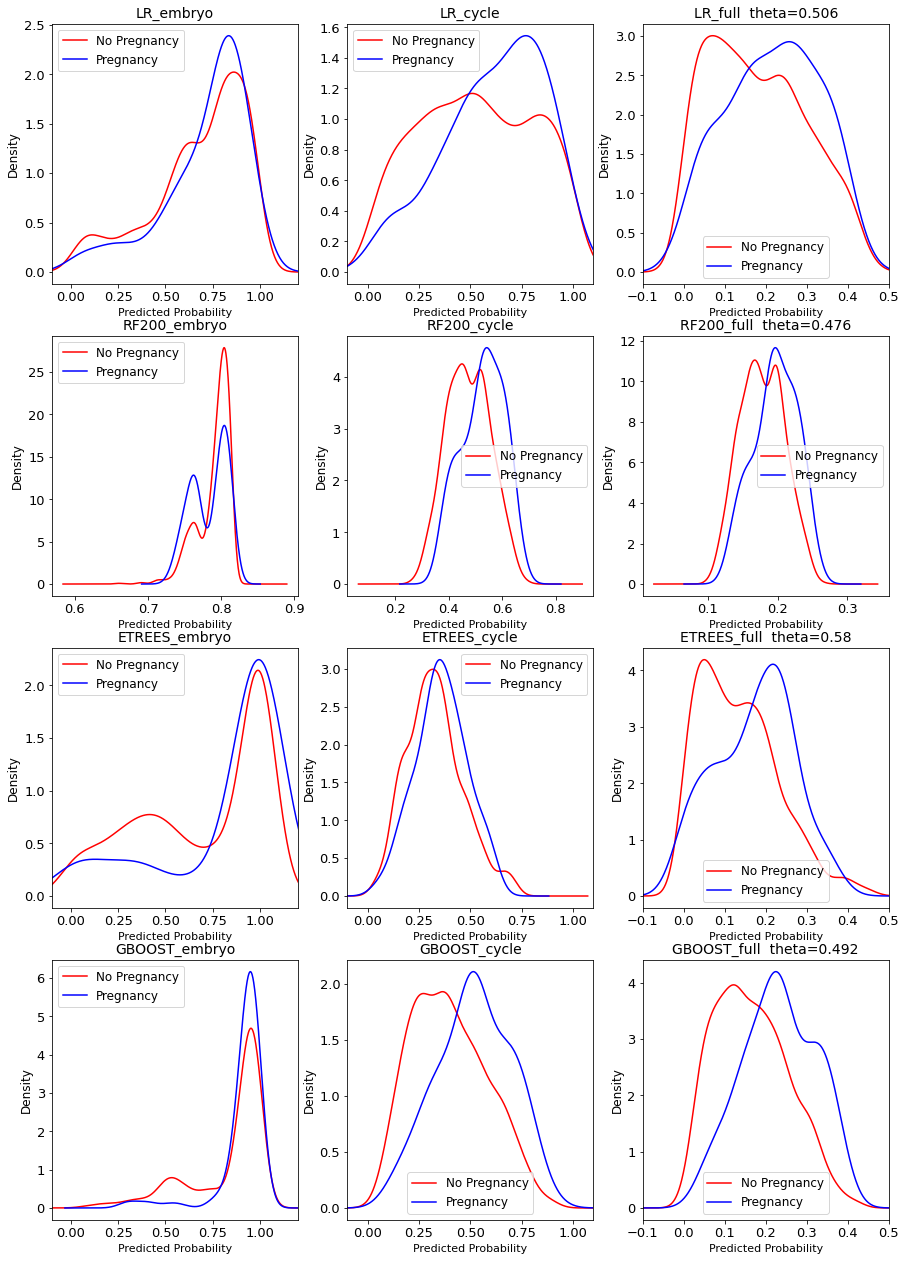

In [39]:
imp = np.asarray(implanted['implanted'])
qua = np.asarray(implanted['quality'])
tra = np.asarray(implanted['transfered'])

df = pd.DataFrame()
types = ['embryo', 'cycle', 'full']
for t in types:
    df['ETREES_'+t] = prob_ETREESh[t]
    df['GBOOST_'+t] = prob_GBOOSTh[t]
    df['LR_'+t] = prob_LRh[t]
    df['RF200_'+t] = prob_RF200h[t]
df['implanted'] = imp
df['quality'] = qua
df['transfered'] = tra

df = df[df['quality'] != 'nan']
print('FULL MODEL')
df = df[df['implanted'] != -1]


colors = {0: 'red', 1: 'blue'}
figure, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 22))

for i in range(2):
    for j in [0, 1]:
        df[df['implanted'] == j]['ETREES_'+types[i]].plot(
            ax=axes[2, i], kind='kde', legend=True, title='ETREES_'+types[i], color=colors[j])
        df[df['implanted'] == j]['GBOOST_'+types[i]].plot(
            ax=axes[3, i], kind='kde', legend=True, title='GBOOST_'+types[i], color=colors[j])
        df[df['implanted'] == j]['LR_'+types[i]].plot(
            ax=axes[0, i], kind='kde', legend=True, title='LR_'+types[i], color=colors[j])
        df[df['implanted'] == j]['RF200_'+types[i]].plot(
            ax=axes[1, i], kind='kde', legend=True, title='RF200_'+types[i], color=colors[j])

i = 2
for j in [0, 1]:
    df[df['implanted'] == j]['ETREES_full'].plot(
        ax=axes[2, i], kind='kde', legend=True, title='ETREES_'+types[i]+"  theta="+round(np.mean(l_metrics_ETREESh, axis=0)[4], 3).astype(str), color=colors[j])
    df[df['implanted'] == j]['GBOOST_full'].plot(
        ax=axes[3, i], kind='kde', legend=True, title='GBOOST_'+types[i]+"  theta="+round(np.mean(l_metrics_GBOOSTh, axis=0)[4], 3).astype(str), color=colors[j])
    df[df['implanted'] == j]['LR_full'].plot(ax=axes[0, i], kind='kde', legend=True,
                                             title='LR_'+types[i]+"  theta="+round(np.mean(l_metrics_LRh, axis=0)[4], 3).astype(str), color=colors[j])
    df[df['implanted'] == j]['RF200_full'].plot(
        ax=axes[1, i], kind='kde', legend=True, title='RF200_'+types[i]+"  theta="+round(np.mean(l_metrics_RF200h, axis=0)[4], 3).astype(str), color=colors[j])

for i in range(4):
    axes[i, 0].legend(["No Pregnancy", "Pregnancy"], prop={'size': 13})
    if i!=1:
        axes[i,0].set_xlim([-0.1,1.2])
        axes[i,1].set_xlim([-0.1,1.1])
        axes[i,2].set_xlim([-0.1,0.5])
    for j in range(3):
        axes[i, j].legend(["No Pregnancy", "Pregnancy"], prop={'size': 12})
        axes[i, j].set_xlabel('Predicted Probability', fontsize=11)
        axes[i, j].set_ylabel('Density', fontsize=12)
        axes[i, j].tick_params(axis='both', which='major', labelsize=13)
        axes[i, j].title.set_fontsize(14)
        

FULL MODEL


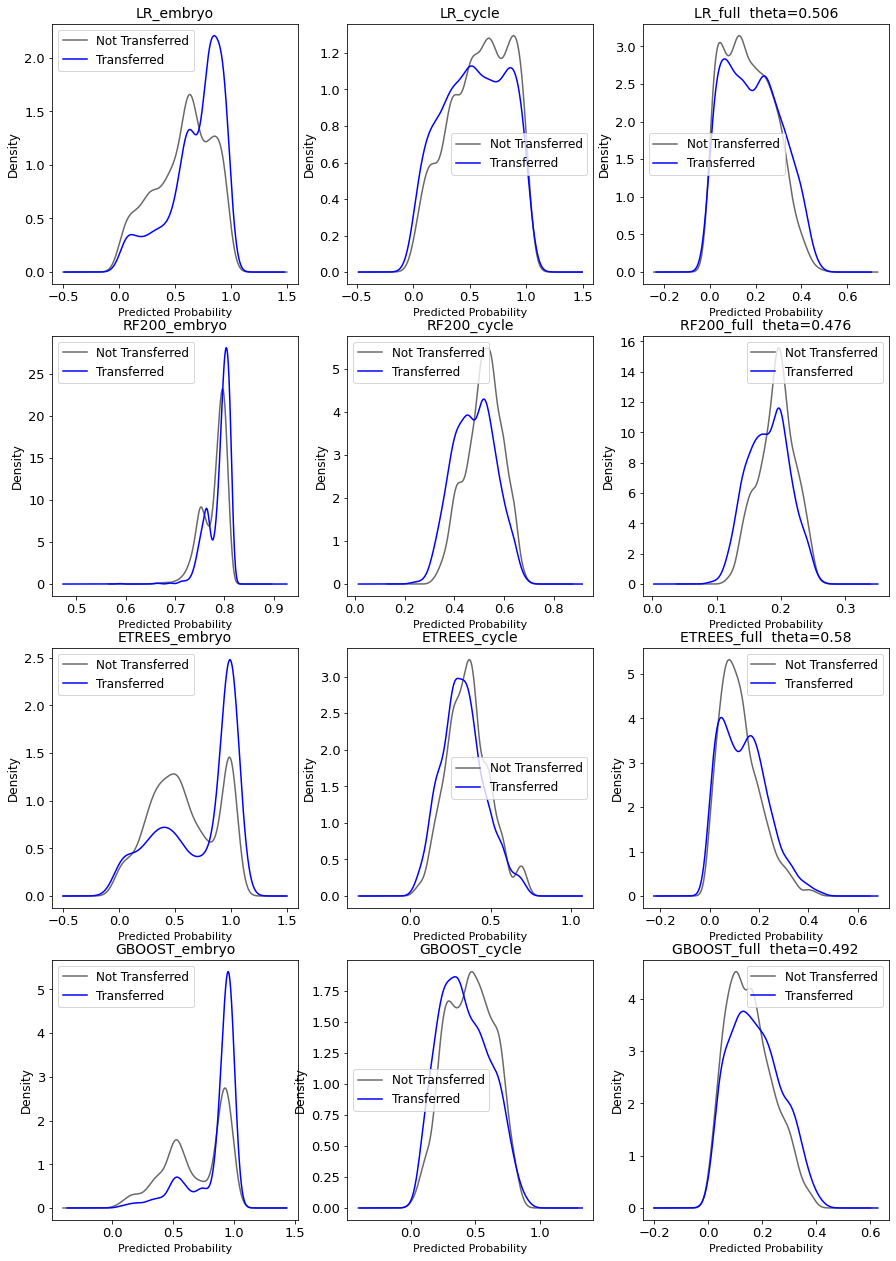

In [40]:
tra = np.asarray(implanted['transfered'])

df = pd.DataFrame()
types = ['embryo', 'cycle', 'full']
for t in types:
    df['ETREES_'+t] = prob_ETREESh[t]
    df['GBOOST_'+t] = prob_GBOOSTh[t]
    df['LR_'+t] = prob_LRh[t]
    df['RF200_'+t] = prob_RF200h[t]

df['transfered'] = tra

print('FULL MODEL')


colors = {0: 'dimgray', 1: 'blue'}
figure, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 22))

for i in range(2):
    for j in [0, 1]:
        df[df['transfered'] == j]['ETREES_'+types[i]].plot(
            ax=axes[2, i], kind='kde', legend=True, title='ETREES_'+types[i], color=colors[j])
        df[df['transfered'] == j]['GBOOST_'+types[i]].plot(
            ax=axes[3, i], kind='kde', legend=True, title='GBOOST_'+types[i], color=colors[j])
        df[df['transfered'] == j]['LR_'+types[i]].plot(
            ax=axes[0, i], kind='kde', legend=True, title='LR_'+types[i], color=colors[j])
        df[df['transfered'] == j]['RF200_'+types[i]].plot(
            ax=axes[1, i], kind='kde', legend=True, title='RF200_'+types[i], color=colors[j])
i = 2
for j in [0, 1]:
    df[df['transfered'] == j]['ETREES_full'].plot(
        ax=axes[2, i], kind='kde', legend=True, title='ETREES_'+types[i]+"  theta="+round(np.mean(l_metrics_ETREESh, axis=0)[4], 3).astype(str), color=colors[j])
    df[df['transfered'] == j]['GBOOST_full'].plot(
        ax=axes[3, i], kind='kde', legend=True, title='GBOOST_'+types[i]+"  theta="+round(np.mean(l_metrics_GBOOSTh, axis=0)[4], 3).astype(str), color=colors[j])
    df[df['transfered'] == j]['LR_full'].plot(ax=axes[0, i], kind='kde', legend=True,
                                             title='LR_'+types[i]+"  theta="+round(np.mean(l_metrics_LRh, axis=0)[4], 3).astype(str), color=colors[j])
    df[df['transfered'] == j]['RF200_full'].plot(
        ax=axes[1, i], kind='kde', legend=True, title='RF200_'+types[i]+"  theta="+round(np.mean(l_metrics_RF200h, axis=0)[4], 3).astype(str), color=colors[j])

for i in range (4):
    axes[i,0].legend(["Not Transferred", "Transferred"],prop={'size': 13})
    for j in range(3):
        axes[i,j].legend(["Not Transferred", "Transferred"],prop={'size': 12})
        axes[i,j].set_xlabel('Predicted Probability',fontsize=11)
        axes[i,j].set_ylabel('Density',fontsize=12)
        axes[i,j].tick_params(axis='both', which='major', labelsize=13)
        axes[i,j].title.set_fontsize(14)

FULL MODEL


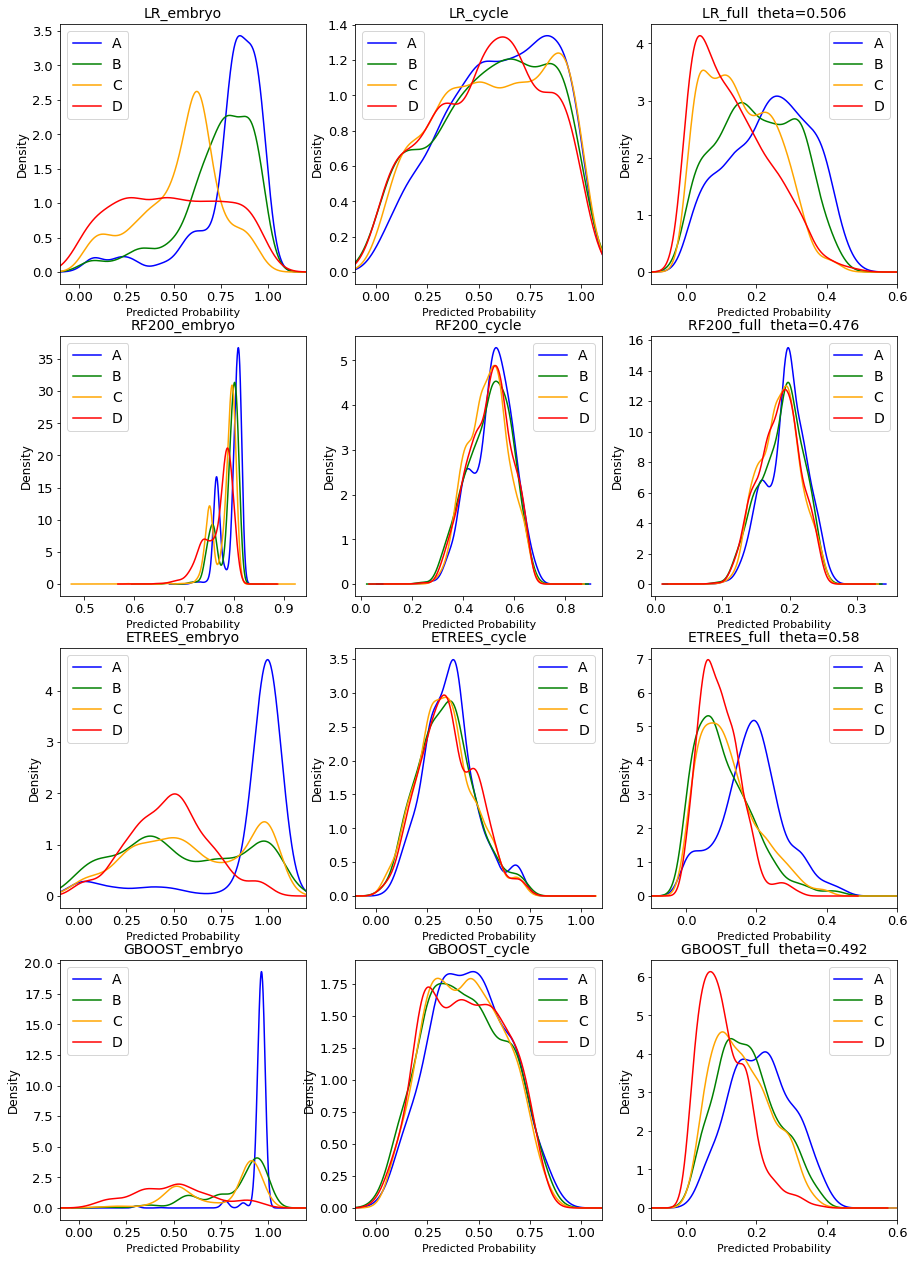

In [41]:
imp=np.asarray(implanted['implanted'])
qua=np.asarray(implanted['quality'])
tra=np.asarray(implanted['transfered'])
df=pd.DataFrame()
types=['embryo','cycle','full']
for t in types:
    df['ETREES_'+t]=prob_ETREESh[t]
    df['GBOOST_'+t]=prob_GBOOSTh[t]
    df['LR_'+t]=prob_LRh[t]
    df['RF200_'+t]=prob_RF200h[t]
df['implanted']=imp
df['quality']=qua
df['transfered']=tra

df=df[df['quality']!='nan']
print('FULL MODEL')

colors = {'A': 'blue', 'B': 'green', 'C': 'orange', 'D': 'red'}
figure, axes = plt.subplots(nrows=4, ncols=3,figsize=(15,22))
for i in range(2):
    for j in ['A','B','C','D']:
        df[df['quality']==j]['ETREES_'+types[i]].plot(ax=axes[2,i],kind='kde',legend=True,title='ETREES_'+types[i],color=colors[j])
        df[df['quality']==j]['GBOOST_'+types[i]].plot(ax=axes[3,i],kind='kde',legend=True,title='GBOOST_'+types[i],color=colors[j])
        df[df['quality']==j]['LR_'+types[i]].plot(ax=axes[0,i],kind='kde',legend=True,title='LR_'+types[i],color=colors[j])
        df[df['quality']==j]['RF200_'+types[i]].plot(ax=axes[1,i],kind='kde',legend=True,title='RF200_'+types[i],color=colors[j])

i=2
for j in ['A','B','C','D']:
    df[df['quality']==j]['ETREES_full'].plot(ax=axes[2,i],kind='kde',legend=True,title='ETREES_'+types[i]+"  theta="+round(np.mean(l_metrics_ETREESh,axis=0)[4],3).astype(str),color=colors[j])
    df[df['quality']==j]['GBOOST_full'].plot(ax=axes[3,i],kind='kde',legend=True,title='GBOOST_'+types[i]+"  theta="+round(np.mean(l_metrics_GBOOSTh,axis=0)[4],3).astype(str),color=colors[j])
    df[df['quality']==j]['LR_full'].plot(ax=axes[0,i],kind='kde',legend=True,title='LR_'+types[i]+"  theta="+round(np.mean(l_metrics_LRh,axis=0)[4],3).astype(str),color=colors[j])
    df[df['quality']==j]['RF200_full'].plot(ax=axes[1,i],kind='kde',legend=True,title='RF200_'+types[i]+"  theta="+round(np.mean(l_metrics_RF200h,axis=0)[4],3).astype(str),color=colors[j])
for i in range (4):
    if i!=1:
        axes[i,0].set_xlim([-0.1,1.2])
        axes[i,1].set_xlim([-0.1,1.1])
        axes[i,2].set_xlim([-0.1,0.6])
    for j in range(3):
        axes[i,j].legend(["A","B","C","D"],prop={'size': 14})
        axes[i,j].set_xlabel('Predicted Probability',fontsize=11)
        axes[i,j].set_ylabel('Density',fontsize=12)
        axes[i,j].tick_params(axis='both', which='major', labelsize=13)
        axes[i,j].title.set_fontsize(14)

# Baseline_0

Now we move to the baseline methods. The structure will be the same as in the last section. First we import the results, then we show the AUC score and the rest of metrics and finally the probability distributions. Since now we only have one output we group all distributions in one figure. Each column corresponding to one of the three different factors of separation.

Some of the obtained distributions may present very sharp peaks, or even the same value for all cases. In those cases the function to plot the density (kde) will not be able to do it. We define an auxiliary function that induces some minor noise in those cases to avoid this.

In [24]:
def addNoise(df,dev):
    df=df.copy()
    sd=df.groupby('quality').std()
    for cl in list(df)[:-3]:
        qu=sd[cl].index.tolist()
        for q in qu:
            aux=df[cl][df['quality']==q]
            noise=np.random.normal(0,dev,aux.shape[0])
            df.loc[df['quality']==q,cl]+=noise
    return df

In [22]:
with open("results/baseline/aucroc_ETREES_0_hidden.pickle", 'rb') as f_pckl3:
    l_results_ETREES = pickle.load(f_pckl3)
with open("results/baseline/aucroc_GBOOST_0_hidden.pickle", 'rb') as f_pckl4:
    l_results_GBOOST = pickle.load(f_pckl4)
with open("results/baseline/aucroc_LR_0_hidden.pickle", 'rb') as f_pckl5:
    l_results_LR = pickle.load(f_pckl5)
with open("results/baseline/aucroc_RF200_0_hidden.pickle", 'rb') as f_pckl7:
    l_results_RF200 = pickle.load(f_pckl7)

with open("results/baseline/metrics_ETREES_0_hidden.pickle", 'rb') as f_pckl3:
    l_metrics_ETREES = pickle.load(f_pckl3)
with open("results/baseline/metrics_GBOOST_0_hidden.pickle", 'rb') as f_pckl4:
    l_metrics_GBOOST = pickle.load(f_pckl4)
with open("results/baseline/metrics_LR_0_hidden.pickle", 'rb') as f_pckl5:
    l_metrics_LR = pickle.load(f_pckl5)
with open("results/baseline/metrics_RF200_0_hidden.pickle", 'rb') as f_pckl7:
    l_metrics_RF200 = pickle.load(f_pckl7)

with open("results/baseline/probabilities_ETREES_0_hidden.pickle", 'rb') as f_pckl3:
    prob_ETREES = pickle.load(f_pckl3)
with open("results/baseline/probabilities_GBOOST_0_hidden.pickle", 'rb') as f_pckl4:
    prob_GBOOST = pickle.load(f_pckl4)
with open("results/baseline/probabilities_LR_0_hidden.pickle", 'rb') as f_pckl5:
    prob_LR = pickle.load(f_pckl5)
with open("results/baseline/probabilities_RF200_0_hidden.pickle", 'rb') as f_pckl7:
    prob_RF200 = pickle.load(f_pckl7)
    
with open("results/baseline/real_info_LR_0_hidden.pickle", 'rb') as f_pckl2:
    implanted = pickle.load(f_pckl2)

In [23]:
l_results=[l_results_ETREES,
          l_results_GBOOST,
          l_results_LR,
          l_results_RF200]
models=['ETREES',
        'GBOOST',
        'LR    ',
        'RF200 ']
for model, l in zip(models,l_results):
    print(model,":\t",np.mean(l),"+-",np.std(l))

ETREES :	 0.6351152165292241 +- 0.06771478729566048
GBOOST :	 0.6220851787877217 +- 0.05126139865514639
LR     :	 0.5809766679909634 +- 0.05551180437819571
RF200  :	 0.6123575823423678 +- 0.06198987382520305


In [25]:
l_metrics = [l_metrics_ETREES,
             l_metrics_GBOOST,
             l_metrics_LR,
             l_metrics_RF200]

print("Model \t lp_loss \t ppr_pos \t log_loss \t log_like")
for model, l in zip(models, l_metrics):
    means = np.mean(l, axis=0)
    dev = np.std(l, axis=0)
    print(model, ":\n", means[0], "+-", dev[0], "\n",
          means[1], "+-", dev[1], "\n", means[2], "+-", dev[2],"\n",
          means[3], "+-", dev[3])

Model 	 lp_loss 	 ppr_pos 	 log_loss 	 log_like
ETREES :
 0.20466353814246369 +- 0.04629219637267564 
 0.002754329300268266 +- 0.0031732602554726715 
 nan +- nan 
 inf +- nan
GBOOST :
 0.2054109135786358 +- 0.04816619214755788 
 0.0010771992818671455 +- 0.002154398563734291 
 0.7516794956383867 +- 0.26806370331596663 
 0.6709997687231442 +- 0.26302326889196315
LR     :
 0.2054109135786358 +- 0.04816619214755788 
 0.0010771992818671455 +- 0.002154398563734291 
 0.7062574833950597 +- 0.1782339789891763 
 0.6297358403058889 +- 0.18043917230308051
RF200  :
 0.20284681101453325 +- 0.050011380569558755 
 0.0 +- 0.0 
 0.7034580779488722 +- 0.19089269524045685 
 0.6183993260067644 +- 0.18494551165834597


C:\Users\adria\anaconda3\lib\site-packages\numpy\core\_methods.py:202: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


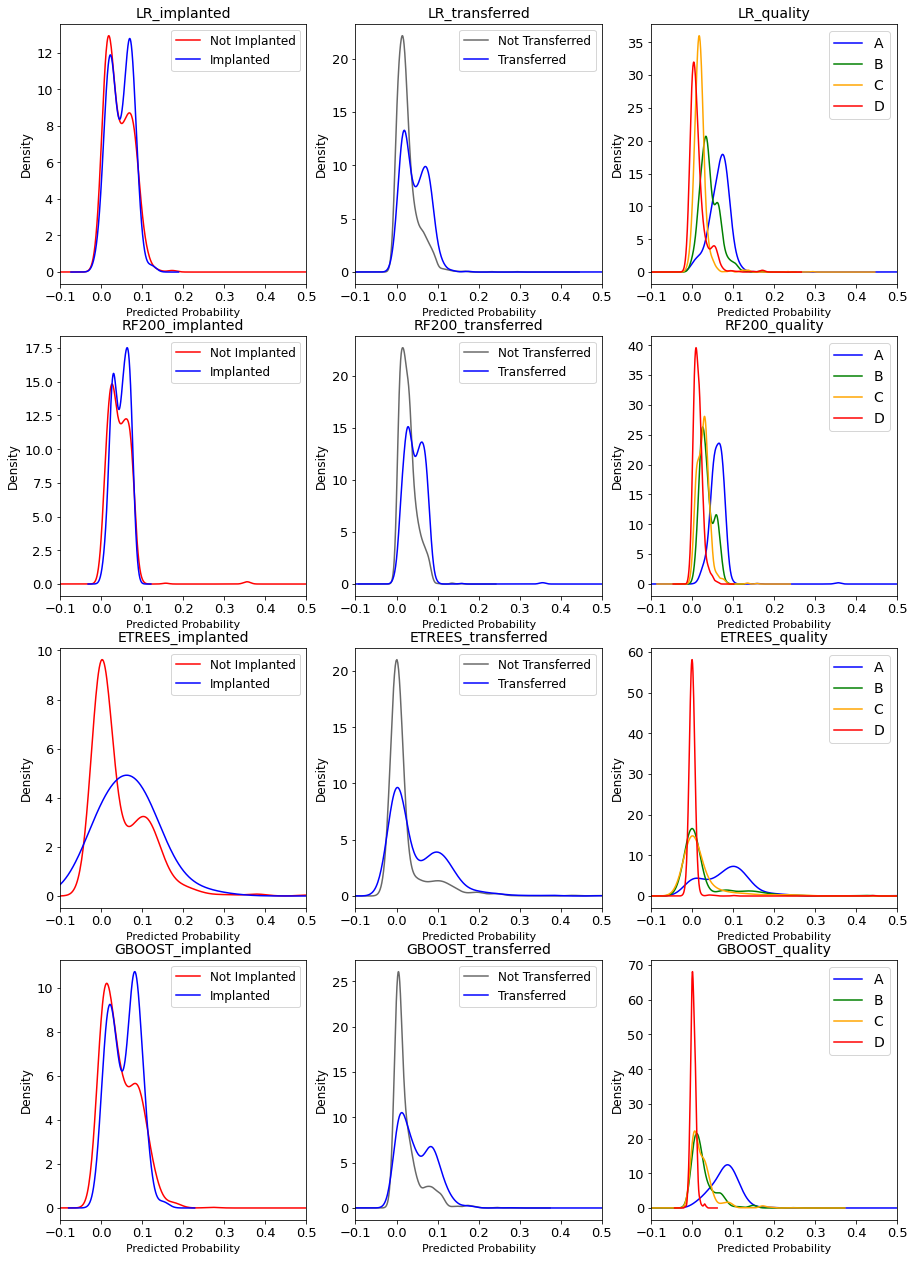

In [26]:
imp=np.asarray(implanted['implanted'])
qua=np.asarray(implanted['quality'])
tra=np.asarray(implanted['transfered'])
import pandas as pd
import matplotlib.pyplot as plt
df=pd.DataFrame()
df['ETREES']=prob_ETREES
df['GBOOST']=prob_GBOOST
df['LR']=prob_LR
df['RF200']=prob_RF200
df['implanted']=imp
df['quality']=qua
df['transfered']=tra

df=df[df['quality']!='nan']
df=addNoise(df,0.005)

figure, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 22))


colors={1: 'blue', 0:'dimgray'}

for i in [0,1]:
    df[df['transfered']==i]['ETREES'].plot(ax=axes[2,1],kind='kde',legend=True,title='ETREES_transferred', color=colors[i])
    df[df['transfered']==i]['GBOOST'].plot(ax=axes[3,1],kind='kde',legend=True,title='GBOOST_transferred', color=colors[i])
    df[df['transfered']==i]['LR'].plot(ax=axes[0,1],kind='kde',legend=True,title='LR_transferred', color=colors[i])
    df[df['transfered']==i]['RF200'].plot(ax=axes[1,1],kind='kde',legend=True,title='RF200_transferred', color=colors[i])

colors = {'A': 'blue', 'B': 'green', 'C': 'orange', 'D': 'red'}
for i in ['A','B','C','D']:
    df[df['quality']==i]['ETREES'].plot(ax=axes[2,2],kind='kde',legend=True,title='ETREES_quality', color=colors[i])
    df[df['quality']==i]['GBOOST'].plot(ax=axes[3,2],kind='kde',legend=True,title='GBOOST_quality', color=colors[i])
    df[df['quality']==i]['LR'].plot(ax=axes[0,2],kind='kde',legend=True,title='LR_quality', color=colors[i])
    df[df['quality']==i]['RF200'].plot(ax=axes[1,2],kind='kde',legend=True,title='RF200_quality', color=colors[i])

colors={1: 'blue', 0:'red'}
for i in [0,1]:
    df[df['implanted']==i]['ETREES'].plot(ax=axes[2,0],kind='kde',legend=True,title='ETREES_implanted', color=colors[i])
    df[df['implanted']==i]['GBOOST'].plot(ax=axes[3,0],kind='kde',legend=True,title='GBOOST_implanted', color=colors[i])
    df[df['implanted']==i]['LR'].plot(ax=axes[0,0],kind='kde',legend=True,title='LR_implanted', color=colors[i])
    df[df['implanted']==i]['RF200'].plot(ax=axes[1,0],kind='kde',legend=True,title='RF200_implanted', color=colors[i])



for i in range (4):
    axes[i,0].legend(["Not Implanted", "Implanted"],prop={'size': 12})
    axes[i,1].legend(["Not Transferred", "Transferred"],prop={'size': 12})
    axes[i,2].legend(['A', 'B','C','D'],prop={'size': 14})
    for j in range(3):
        axes[i,j].set_xlabel('Predicted Probability',fontsize=11)
        axes[i,j].set_ylabel('Density',fontsize=12)
        axes[i,j].tick_params(axis='both', which='major', labelsize=13)
        axes[i,j].title.set_fontsize(14)
        axes[i,j].set_xlim([-0.1,0.5])

# Baseline Cycles - Hidden Quality

In [237]:
with open("results/baseline/aucroc_ETREES_cycles_hidden.pickle", 'rb') as f_pckl3:
    l_results_ETREES = pickle.load(f_pckl3)
with open("results/baseline/aucroc_GBOOST_cycles_hidden.pickle", 'rb') as f_pckl4:
    l_results_GBOOST = pickle.load(f_pckl4)
with open("results/baseline/aucroc_LR_cycles_hidden.pickle", 'rb') as f_pckl5:
    l_results_LR = pickle.load(f_pckl5)
with open("results/baseline/aucroc_RF200_cycles_hidden.pickle", 'rb') as f_pckl7:
    l_results_RF200 = pickle.load(f_pckl7)

with open("results/baseline/metrics_ETREES_cycles_hidden.pickle", 'rb') as f_pckl3:
    l_metrics_ETREES = pickle.load(f_pckl3)
with open("results/baseline/metrics_GBOOST_cycles_hidden.pickle", 'rb') as f_pckl4:
    l_metrics_GBOOST = pickle.load(f_pckl4)
with open("results/baseline/metrics_LR_cycles_hidden.pickle", 'rb') as f_pckl5:
    l_metrics_LR = pickle.load(f_pckl5)
with open("results/baseline/metrics_RF200_cycles_hidden.pickle", 'rb') as f_pckl7:
    l_metrics_RF200 = pickle.load(f_pckl7)

with open("results/baseline/probabilities_ETREES_cycles_hidden.pickle", 'rb') as f_pckl3:
    prob_ETREES = pickle.load(f_pckl3)
with open("results/baseline/probabilities_GBOOST_cycles_hidden.pickle", 'rb') as f_pckl4:
    prob_GBOOST = pickle.load(f_pckl4)
with open("results/baseline/probabilities_LR_cycles_hidden.pickle", 'rb') as f_pckl5:
    prob_LR = pickle.load(f_pckl5)
with open("results/baseline/probabilities_RF200_cycles_hidden.pickle", 'rb') as f_pckl7:
    prob_RF200 = pickle.load(f_pckl7)
    
with open("results/baseline/real_info_LR_cycles_hidden.pickle", 'rb') as f_pckl2:
    implanted = pickle.load(f_pckl2)

In [238]:
l_results=[l_results_ETREES,
          l_results_GBOOST,
          l_results_LR,
          l_results_RF200]
models=['ETREES',
        'GBOOST',
        'LR    ',
        'RF200 ']
for model, l in zip(models,l_results):
    print(model,":\t",np.mean(l),"+-",np.std(l))

ETREES :	 0.6159409159017739 +- 0.054440144854157366
GBOOST :	 0.7200188821716237 +- 0.051939345010090746
LR     :	 0.6316836512121087 +- 0.0675704953337806
RF200  :	 0.7352787063066379 +- 0.06255043529849384


In [239]:
l_metrics = [l_metrics_ETREES,
             l_metrics_GBOOST,
             l_metrics_LR,
             l_metrics_RF200]

print("Model \t lp_loss \t ppr_pos \t log_loss \t log_like")
for model, l in zip(models, l_metrics):
    means = np.mean(l, axis=0)
    dev = np.std(l, axis=0)
    print(model, ":\n", means[0], "+-", dev[0], "\n",
          means[1], "+-", dev[1], "\n", means[2], "+-", dev[2],"\n",
          means[3], "+-", dev[3])

Model 	 lp_loss 	 ppr_pos 	 log_loss 	 log_like
ETREES :
 0.20284681101453325 +- 0.050011380569558755 
 0.0 +- 0.0 
 0.6901212293736778 +- 0.10046200392263857 
 inf +- nan
GBOOST :
 0.20455621272393495 +- 0.04872908095870315 
 0.005215068919981601 +- 0.006685055486144838 
 0.725239059876384 +- 0.1279911271603414 
 0.6431945940229165 +- 0.12056870176310597
LR     :
 0.2043569967352453 +- 0.04793640718814958 
 0.0022678907408054437 +- 0.0024421013003039825 
 0.7699199515063719 +- 0.2454814432567598 
 0.6960296844001272 +- 0.2496757047639022
RF200  :
 0.20284681101453325 +- 0.050011380569558755 
 0.0 +- 0.0 
 0.6679312661352093 +- 0.15962648986348144 
 0.5817980111105929 +- 0.15142008296028608


C:\Users\adria\anaconda3\lib\site-packages\numpy\core\_methods.py:202: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


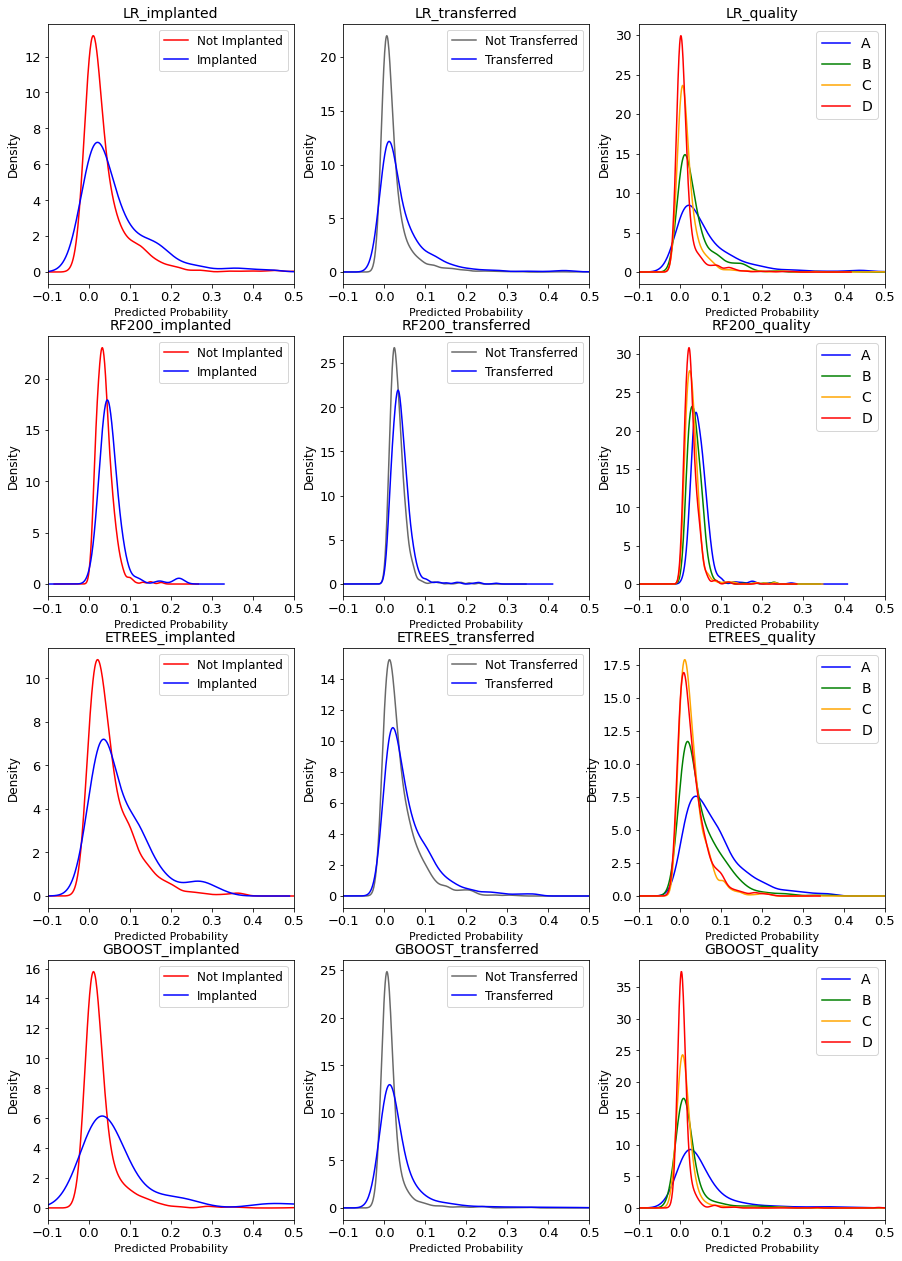

In [240]:
imp=np.asarray(implanted['implanted'])
qua=np.asarray(implanted['quality'])
tra=np.asarray(implanted['transfered'])
import pandas as pd
import matplotlib.pyplot as plt
df=pd.DataFrame()
df['ETREES']=prob_ETREES
df['GBOOST']=prob_GBOOST
df['LR']=prob_LR
df['RF200']=prob_RF200
df['implanted']=imp
df['quality']=qua
df['transfered']=tra

df=df[df['quality']!='nan']
df=addNoise(df,0.005)

figure, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 22))


colors={1: 'blue', 0:'dimgray'}

for i in [0,1]:
    df[df['transfered']==i]['ETREES'].plot(ax=axes[2,1],kind='kde',legend=True,title='ETREES_transferred', color=colors[i])
    df[df['transfered']==i]['GBOOST'].plot(ax=axes[3,1],kind='kde',legend=True,title='GBOOST_transferred', color=colors[i])
    df[df['transfered']==i]['LR'].plot(ax=axes[0,1],kind='kde',legend=True,title='LR_transferred', color=colors[i])
    df[df['transfered']==i]['RF200'].plot(ax=axes[1,1],kind='kde',legend=True,title='RF200_transferred', color=colors[i])

colors = {'A': 'blue', 'B': 'green', 'C': 'orange', 'D': 'red'}
for i in ['A','B','C','D']:
    df[df['quality']==i]['ETREES'].plot(ax=axes[2,2],kind='kde',legend=True,title='ETREES_quality', color=colors[i])
    df[df['quality']==i]['GBOOST'].plot(ax=axes[3,2],kind='kde',legend=True,title='GBOOST_quality', color=colors[i])
    df[df['quality']==i]['LR'].plot(ax=axes[0,2],kind='kde',legend=True,title='LR_quality', color=colors[i])
    df[df['quality']==i]['RF200'].plot(ax=axes[1,2],kind='kde',legend=True,title='RF200_quality', color=colors[i])

colors={1: 'blue', 0:'red'}
for i in [0,1]:
    df[df['implanted']==i]['ETREES'].plot(ax=axes[2,0],kind='kde',legend=True,title='ETREES_implanted', color=colors[i])
    df[df['implanted']==i]['GBOOST'].plot(ax=axes[3,0],kind='kde',legend=True,title='GBOOST_implanted', color=colors[i])
    df[df['implanted']==i]['LR'].plot(ax=axes[0,0],kind='kde',legend=True,title='LR_implanted', color=colors[i])
    df[df['implanted']==i]['RF200'].plot(ax=axes[1,0],kind='kde',legend=True,title='RF200_implanted', color=colors[i])



for i in range (4):
    axes[i,0].legend(["Not Implanted", "Implanted"],prop={'size': 12})
    axes[i,1].legend(["Not Transferred", "Transferred"],prop={'size': 12})
    axes[i,2].legend(['A', 'B','C','D'],prop={'size': 14})
    for j in range(3):
        axes[i,j].set_xlabel('Predicted Probability',fontsize=11)
        axes[i,j].set_ylabel('Density',fontsize=12)
        axes[i,j].tick_params(axis='both', which='major', labelsize=13)
        axes[i,j].title.set_fontsize(14)
        axes[i,j].set_xlim([-0.1,0.5])

# Naive EM - Hidden Quality

In [241]:
with open("results/baseline/aucroc_ETREES_NaiveEM_hidden.pickle", 'rb') as f_pckl3:
    l_results_ETREES = pickle.load(f_pckl3)
with open("results/baseline/aucroc_GBOOST_NaiveEM_hidden.pickle", 'rb') as f_pckl4:
    l_results_GBOOST = pickle.load(f_pckl4)
with open("results/baseline/aucroc_LR_NaiveEM_hidden.pickle", 'rb') as f_pckl5:
    l_results_LR = pickle.load(f_pckl5)
with open("results/baseline/aucroc_RF200_NaiveEM_hidden.pickle", 'rb') as f_pckl7:
    l_results_RF200 = pickle.load(f_pckl7)

with open("results/baseline/metrics_ETREES_NaiveEM_hidden.pickle", 'rb') as f_pckl3:
    l_metrics_ETREES = pickle.load(f_pckl3)
with open("results/baseline/metrics_GBOOST_NaiveEM_hidden.pickle", 'rb') as f_pckl4:
    l_metrics_GBOOST = pickle.load(f_pckl4)
with open("results/baseline/metrics_LR_NaiveEM_hidden.pickle", 'rb') as f_pckl5:
    l_metrics_LR = pickle.load(f_pckl5)
with open("results/baseline/metrics_RF200_NaiveEM_hidden.pickle", 'rb') as f_pckl7:
    l_metrics_RF200 = pickle.load(f_pckl7)

with open("results/baseline/probabilities_ETREES_NaiveEM_hidden.pickle", 'rb') as f_pckl3:
    prob_ETREES = pickle.load(f_pckl3)
with open("results/baseline/probabilities_GBOOST_NaiveEM_hidden.pickle", 'rb') as f_pckl4:
    prob_GBOOST = pickle.load(f_pckl4)
with open("results/baseline/probabilities_LR_NaiveEM_hidden.pickle", 'rb') as f_pckl5:
    prob_LR = pickle.load(f_pckl5)
with open("results/baseline/probabilities_RF200_NaiveEM_hidden.pickle", 'rb') as f_pckl7:
    prob_RF200 = pickle.load(f_pckl7)
    
with open("results/baseline/real_info_LR_NaiveEM_hidden.pickle", 'rb') as f_pckl2:
    implanted = pickle.load(f_pckl2)

In [242]:
l_results=[l_results_ETREES,
          l_results_GBOOST,
          l_results_LR,
          l_results_RF200]
models=['ETREES',
        'GBOOST',
        'LR    ',
        'RF200 ']
for model, l in zip(models,l_results):
    print(model,":\t",np.mean(l),"+-",np.std(l))

ETREES :	 0.5037153943563046 +- 0.08133532469724551
GBOOST :	 0.6136920369289894 +- 0.08108541700973361
LR     :	 0.5596865873212213 +- 0.06404676422710481
RF200  :	 0.5525497590600108 +- 0.07233031720535292


In [243]:
l_metrics = [l_metrics_ETREES,
             l_metrics_GBOOST,
             l_metrics_LR,
             l_metrics_RF200]

print("Model \t lp_loss \t ppr_pos \t log_loss \t log_like")
for model, l in zip(models, l_metrics):
    means = np.mean(l, axis=0)
    dev = np.std(l, axis=0)
    print(model, ":\n", means[0], "+-", dev[0], "\n",
          means[1], "+-", dev[1], "\n", means[2], "+-", dev[2],"\n",
          means[3], "+-", dev[3])

Model 	 lp_loss 	 ppr_pos 	 log_loss 	 log_like
ETREES :
 0.26790820516524816 +- 0.03925237915243931 
 0.15671068290109508 +- 0.023810927503979958 
 2.1762255326692452 +- 2.873921647427024 
 inf +- nan
GBOOST :
 0.2054109135786358 +- 0.04816619214755788 
 0.0029398647494121256 +- 0.00301625392661851 
 0.5914329036654522 +- 0.12685123518242117 
 0.5072984564157469 +- 0.12137894832199189
LR     :
 0.20284681101453325 +- 0.050011380569558755 
 0.0 +- 0.0 
 0.5898360792769598 +- 0.10959868431739289 
 0.507564642241415 +- 0.11070139814446744
RF200  :
 0.20284681101453325 +- 0.050011380569558755 
 0.0 +- 0.0 
 0.5436287773265229 +- 0.1130479165855535 
 0.45745492906995483 +- 0.10857355219886079


C:\Users\adria\anaconda3\lib\site-packages\numpy\core\_methods.py:202: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


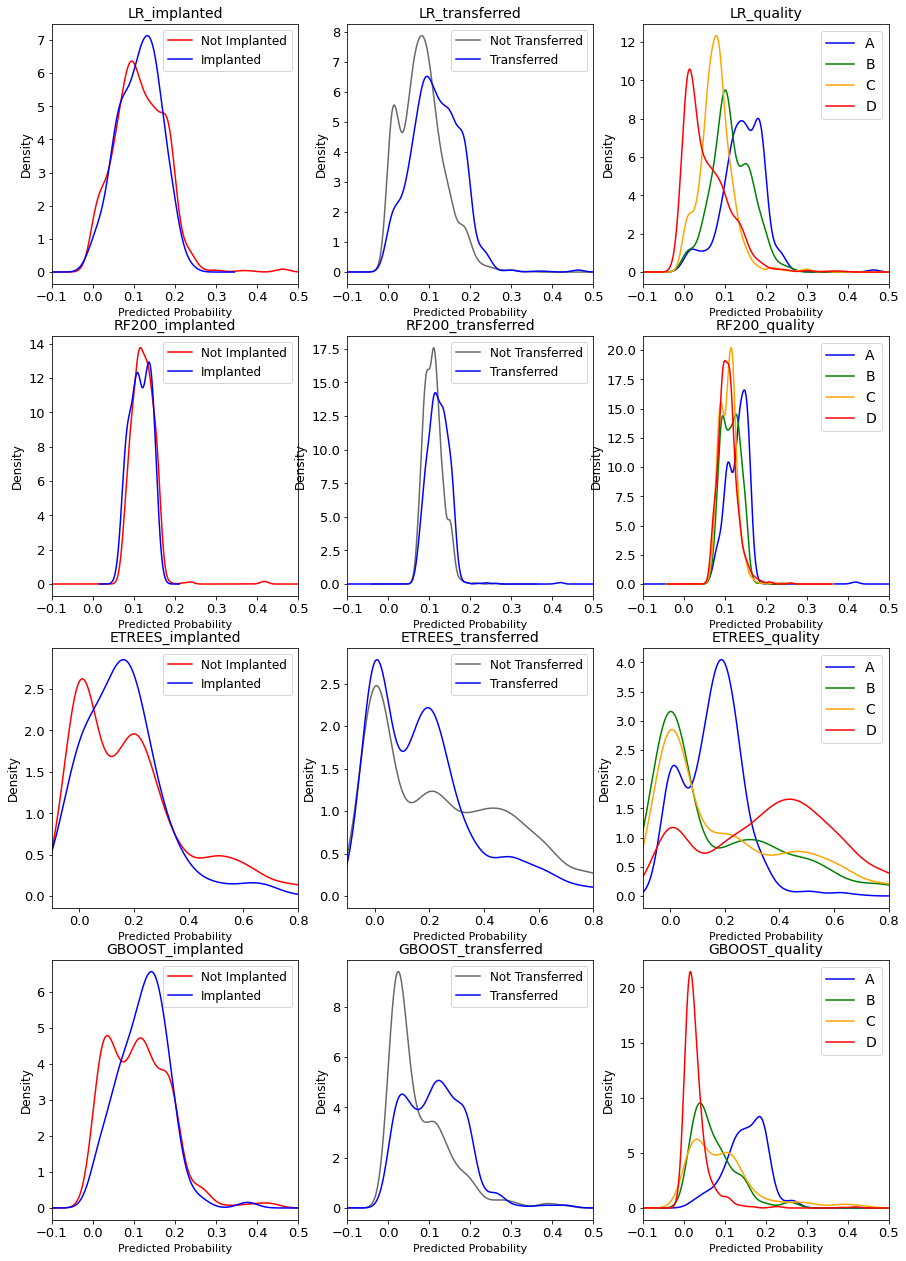

In [244]:
imp=np.asarray(implanted['implanted'])
qua=np.asarray(implanted['quality'])
tra=np.asarray(implanted['transfered'])
import pandas as pd
import matplotlib.pyplot as plt
df=pd.DataFrame()
df['ETREES']=prob_ETREES
df['GBOOST']=prob_GBOOST
df['LR']=prob_LR
df['RF200']=prob_RF200
df['implanted']=imp
df['quality']=qua
df['transfered']=tra

df=df[df['quality']!='nan']
df=addNoise(df,0.005)

figure, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 22))


colors={1: 'blue', 0:'dimgray'}

for i in [0,1]:
    df[df['transfered']==i]['ETREES'].plot(ax=axes[2,1],kind='kde',legend=True,title='ETREES_transferred', color=colors[i])
    df[df['transfered']==i]['GBOOST'].plot(ax=axes[3,1],kind='kde',legend=True,title='GBOOST_transferred', color=colors[i])
    df[df['transfered']==i]['LR'].plot(ax=axes[0,1],kind='kde',legend=True,title='LR_transferred', color=colors[i])
    df[df['transfered']==i]['RF200'].plot(ax=axes[1,1],kind='kde',legend=True,title='RF200_transferred', color=colors[i])

colors = {'A': 'blue', 'B': 'green', 'C': 'orange', 'D': 'red'}
for i in ['A','B','C','D']:
    df[df['quality']==i]['ETREES'].plot(ax=axes[2,2],kind='kde',legend=True,title='ETREES_quality', color=colors[i])
    df[df['quality']==i]['GBOOST'].plot(ax=axes[3,2],kind='kde',legend=True,title='GBOOST_quality', color=colors[i])
    df[df['quality']==i]['LR'].plot(ax=axes[0,2],kind='kde',legend=True,title='LR_quality', color=colors[i])
    df[df['quality']==i]['RF200'].plot(ax=axes[1,2],kind='kde',legend=True,title='RF200_quality', color=colors[i])

colors={1: 'blue', 0:'red'}
for i in [0,1]:
    df[df['implanted']==i]['ETREES'].plot(ax=axes[2,0],kind='kde',legend=True,title='ETREES_implanted', color=colors[i])
    df[df['implanted']==i]['GBOOST'].plot(ax=axes[3,0],kind='kde',legend=True,title='GBOOST_implanted', color=colors[i])
    df[df['implanted']==i]['LR'].plot(ax=axes[0,0],kind='kde',legend=True,title='LR_implanted', color=colors[i])
    df[df['implanted']==i]['RF200'].plot(ax=axes[1,0],kind='kde',legend=True,title='RF200_implanted', color=colors[i])



for i in range (4):
    axes[i,0].legend(["Not Implanted", "Implanted"],prop={'size': 12})
    axes[i,1].legend(["Not Transferred", "Transferred"],prop={'size': 12})
    axes[i,2].legend(['A', 'B','C','D'],prop={'size': 14})
    for j in range(3):
        axes[i,j].set_xlabel('Predicted Probability',fontsize=11)
        axes[i,j].set_ylabel('Density',fontsize=12)
        axes[i,j].tick_params(axis='both', which='major', labelsize=13)
        axes[i,j].title.set_fontsize(14)
        axes[i,j].set_xlim([-0.1,0.5])
        axes[2,j].set_xlim([-0.1,0.8])

# EM w LP - Hidden Quality

In [250]:
with open("results/baseline/aucroc_ETREES_EM_hidden.pickle", 'rb') as f_pckl3:
    l_results_ETREES = pickle.load(f_pckl3)
with open("results/baseline/aucroc_GBOOST_EM_hidden.pickle", 'rb') as f_pckl4:
    l_results_GBOOST = pickle.load(f_pckl4)
with open("results/baseline/aucroc_LR_EM_hidden.pickle", 'rb') as f_pckl5:
    l_results_LR = pickle.load(f_pckl5)
with open("results/baseline/aucroc_RF200_eEM_hidden.pickle", 'rb') as f_pckl7:
    l_results_RF200 = pickle.load(f_pckl7)

with open("results/baseline/metrics_ETREES_EM_hidden.pickle", 'rb') as f_pckl3:
    l_metrics_ETREES = pickle.load(f_pckl3)
with open("results/baseline/metrics_GBOOST_EM_hidden.pickle", 'rb') as f_pckl4:
    l_metrics_GBOOST = pickle.load(f_pckl4)
with open("results/baseline/metrics_LR_EM_hidden.pickle", 'rb') as f_pckl5:
    l_metrics_LR = pickle.load(f_pckl5)
with open("results/baseline/metrics_RF200_EM_hidden.pickle", 'rb') as f_pckl7:
    l_metrics_RF200 = pickle.load(f_pckl7)

with open("results/baseline/probabilities_ETREES_EM_hidden.pickle", 'rb') as f_pckl3:
    prob_ETREES = pickle.load(f_pckl3)
with open("results/baseline/probabilities_GBOOST_EM_hidden.pickle", 'rb') as f_pckl4:
    prob_GBOOST = pickle.load(f_pckl4)
with open("results/baseline/probabilities_LR_EM_hidden.pickle", 'rb') as f_pckl5:
    prob_LR = pickle.load(f_pckl5)
with open("results/baseline/probabilities_RF200_EM_hidden.pickle", 'rb') as f_pckl7:
    prob_RF200 = pickle.load(f_pckl7)
    
with open("results/baseline/real_info_LR_EM_hidden.pickle", 'rb') as f_pckl2:
    implanted = pickle.load(f_pckl2)

In [251]:
l_results=[l_results_ETREES,
          l_results_GBOOST,
          l_results_LR,
          l_results_RF200]
models=['ETREES',
        'GBOOST',
        'LR    ',
        'RF200 ']
for model, l in zip(models,l_results):
    print(model,":\t",np.mean(l),"+-",np.std(l))

ETREES :	 0.480840657332067 +- 0.08474859258171402
GBOOST :	 0.6035122813008367 +- 0.0791800997729251
LR     :	 0.5600978641019148 +- 0.06149832442231788
RF200  :	 0.5846220810510088 +- 0.07411725741777328


In [252]:
l_metrics = [l_metrics_ETREES,
             l_metrics_GBOOST,
             l_metrics_LR,
             l_metrics_RF200]

print("Model \t lp_loss \t ppr_pos \t log_loss \t log_like")
for model, l in zip(models, l_metrics):
    means = np.mean(l, axis=0)
    dev = np.std(l, axis=0)
    print(model, ":\n", means[0], "+-", dev[0], "\n",
          means[1], "+-", dev[1], "\n", means[2], "+-", dev[2],"\n",
          means[3], "+-", dev[3])

Model 	 lp_loss 	 ppr_pos 	 log_loss 	 log_like
ETREES :
 0.2518785843529237 +- 0.019176324678839996 
 0.17989043377073863 +- 0.029943337161865407 
 0.5597927972110959 +- 0.06395664599924579 
 0.4752360057694774 +- 0.0666650976544689
GBOOST :
 0.21208143603863192 +- 0.04504886208298467 
 0.010816945277719162 +- 0.013097697961170322 
 0.5284085070343563 +- 0.05431734154465988 
 0.4433796017361762 +- 0.04707256659840498
LR     :
 0.20447371264143488 +- 0.04926263196170726 
 0.001698189553777352 +- 0.0014982085862380152 
 0.5552650526802358 +- 0.057387531858116375 
 0.47064848647608404 +- 0.05255782004909232
RF200  :
 0.20284681101453325 +- 0.050011380569558755 
 0.0 +- 0.0 
 0.5103307998690083 +- 0.06884828606979823 
 0.423925887470553 +- 0.06271658337790638


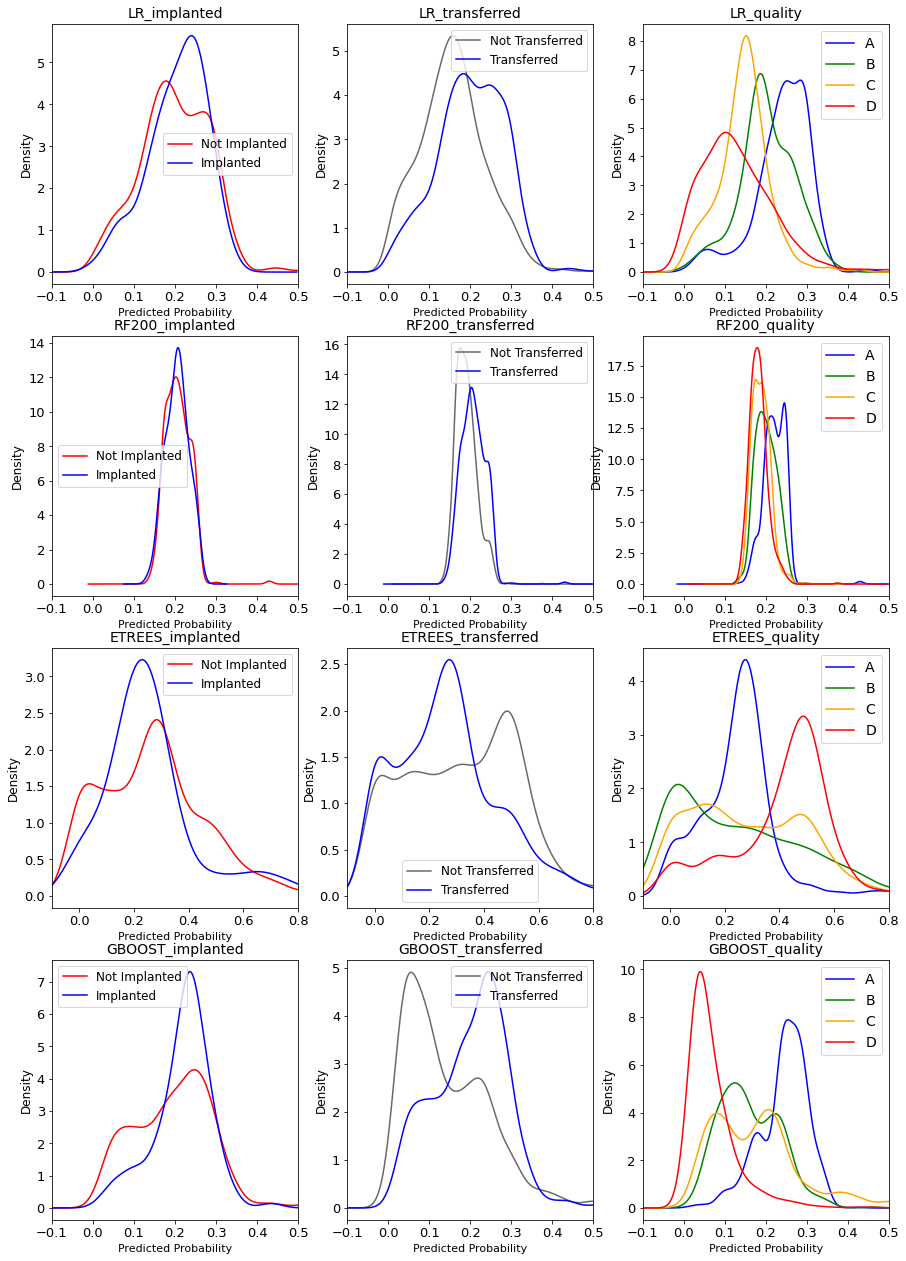

In [255]:
imp=np.asarray(implanted['implanted'])
qua=np.asarray(implanted['quality'])
tra=np.asarray(implanted['transfered'])
import pandas as pd
import matplotlib.pyplot as plt
df=pd.DataFrame()
df['ETREES']=prob_ETREES
df['GBOOST']=prob_GBOOST
df['LR']=prob_LR
df['RF200']=prob_RF200
df['implanted']=imp
df['quality']=qua
df['transfered']=tra

df=df[df['quality']!='nan']
df=addNoise(df,0.005)

figure, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 22))


colors={1: 'blue', 0:'dimgray'}

for i in [0,1]:
    df[df['transfered']==i]['ETREES'].plot(ax=axes[2,1],kind='kde',legend=True,title='ETREES_transferred', color=colors[i])
    df[df['transfered']==i]['GBOOST'].plot(ax=axes[3,1],kind='kde',legend=True,title='GBOOST_transferred', color=colors[i])
    df[df['transfered']==i]['LR'].plot(ax=axes[0,1],kind='kde',legend=True,title='LR_transferred', color=colors[i])
    df[df['transfered']==i]['RF200'].plot(ax=axes[1,1],kind='kde',legend=True,title='RF200_transferred', color=colors[i])

colors = {'A': 'blue', 'B': 'green', 'C': 'orange', 'D': 'red'}
for i in ['A','B','C','D']:
    df[df['quality']==i]['ETREES'].plot(ax=axes[2,2],kind='kde',legend=True,title='ETREES_quality', color=colors[i])
    df[df['quality']==i]['GBOOST'].plot(ax=axes[3,2],kind='kde',legend=True,title='GBOOST_quality', color=colors[i])
    df[df['quality']==i]['LR'].plot(ax=axes[0,2],kind='kde',legend=True,title='LR_quality', color=colors[i])
    df[df['quality']==i]['RF200'].plot(ax=axes[1,2],kind='kde',legend=True,title='RF200_quality', color=colors[i])

colors={1: 'blue', 0:'red'}
for i in [0,1]:
    df[df['implanted']==i]['ETREES'].plot(ax=axes[2,0],kind='kde',legend=True,title='ETREES_implanted', color=colors[i])
    df[df['implanted']==i]['GBOOST'].plot(ax=axes[3,0],kind='kde',legend=True,title='GBOOST_implanted', color=colors[i])
    df[df['implanted']==i]['LR'].plot(ax=axes[0,0],kind='kde',legend=True,title='LR_implanted', color=colors[i])
    df[df['implanted']==i]['RF200'].plot(ax=axes[1,0],kind='kde',legend=True,title='RF200_implanted', color=colors[i])



for i in range (4):
    axes[i,0].legend(["Not Implanted", "Implanted"],prop={'size': 12})
    axes[i,1].legend(["Not Transferred", "Transferred"],prop={'size': 12})
    axes[i,2].legend(['A', 'B','C','D'],prop={'size': 14})
    for j in range(3):
        axes[i,j].set_xlabel('Predicted Probability',fontsize=11)
        axes[i,j].set_ylabel('Density',fontsize=12)
        axes[i,j].tick_params(axis='both', which='major', labelsize=13)
        axes[i,j].title.set_fontsize(14)
        axes[i,j].set_xlim([-0.1,0.5])
        axes[2,j].set_xlim([-0.1,0.8])
    